# AutoML Regression Modelling with PyCaret

In [61]:
import pandas as pd
from pycaret.regression import *
from datetime import datetime, date
%matplotlib inline

#sen1 = pd.read_csv("sentencing_s.csv")
sen2 = pd.read_csv("./sentencing_post_eda.csv")

In [62]:
sen2 = sen2[sen2.county=="pinellas"] 

In [63]:
len(sen2)

113700

In [64]:
sen2 = sen2[sen2["statut"].str.startswith("893", na=False)]

In [6]:
len(sen2)

42101

In [47]:
sen2[["age", "totpts", "sp_cj_total_days", "totpts_cut_group"]].describe().apply(lambda s: s.apply('{0:.2f}'.format))

,age,totpts,sp_cj_total_days,totpts_cut_group
count,1227930.00,1227930.00,1227930.00,1227930.00
mean,32.86,37.39,379.01,1.62
std,10.96,29.60,826.47,2.50
min,0.00,0.20,0.00,0.00
25%,24.00,18.40,0.00,0.00
50%,30.00,29.80,60.00,1.00
75%,41.00,43.40,366.00,1.00
max,114.00,199.60,13259.00,17.00


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'totpts'}>],
       [<AxesSubplot:title={'center':'sp_cj_total_days'}>,
        <AxesSubplot:title={'center':'totpts_cut_group'}>]], dtype=object)

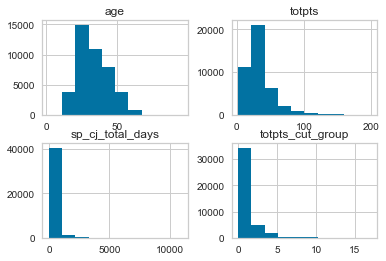

In [8]:
sen2[["age", "totpts", "sp_cj_total_days", "totpts_cut_group"]].hist()

In [9]:
js=sen2.judge.unique()

In [10]:
len(js)

370

In [11]:
js

array(['LUCE', 'BULONE, J.', 'FEDERICO', 'LEY', 'NEWTON', 'ALLAN,L.',
       'BULONE', 'ALLAN', 'DOWNEY', 'QUESADA', 'PETERS', 'LUCE, R.',
       'MCGRADY, J.', 'MEYER', 'COVERT', 'PETERS, R.', 'HELINGER',
       'FEDERICO, P.', 'COVERT, T.', 'CAMPBELL', 'FARNELL', 'ANDREWS',
       'SCHAEFER', 'QUESADA, F.', 'CRANE, S.', 'MCGRADY', 'HELINGER, C',
       'FARNELL, D.', 'BURGESS', 'LAUGHLIN', 'DITTMER', 'BURGESS III',
       'BAIRD, W.', 'C. HELINGER', 'MORRIS', 'HELINGER, C.', 'BAIRD',
       'HELINGERC', 'LEY, N.', 'FFEDERICO', 'T COVERT', 'FEDERICO,  P.',
       'COVERTF', 'MORRIS, R.', 'FEDERICO,P.', 'ALLEN,L.', 'CRANE',
       'LUCE,R.', 'ST.ARNOLD', 'LEVINE', 'FARNELL,D.', 'DAY, J.',
       'HELLINGER', 'MEYER,KEITH', 'GROSS', 'GROSS, R.', 'BEACH',
       'BAIRD,W.', 'FEDERICO, F.', 'DOWNEY, B.', 'BAIRD, D.',
       'PETERS, T.', 'SIRACUSA, P.', 'MORRIS, J.', 'GRUBE', 'LAUGHLIN,L.',
       'FARNELL, C', 'LEY, J.', 'LEY,N.', 'FARNELL,C', 'LEVINE, P.',
       'LAUGLIN', 'BULOEN, J.'

In [65]:
sen2 = sen2[['sp_cj_total_days', 'gender', 'age', 'race', 'circuit', 'totpts_cut_group', 'clfely']]

data = sen2.sample(frac=0.9, random_state=786)
data_unseen = sen2.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (37891, 7)
Unseen Data For Predictions: (4210, 7)


In [66]:
from pycaret.regression import *
X = setup(data = data, target = 'sp_cj_total_days', session_id=123, normalize = True, 
          transformation = True, #transform_target = True
          )

#X = setup(data = data, target = 'sp_cj_total_days', session_id=123, normalize = True, 
#          transformation = True, transform_target = True, 
#          combine_rare_levels = True, rare_level_threshold = 0.05,
#          remove_multicollinearity = True, multicollinearity_threshold = 0.95)

#, categorical_features = ['race', 'gender', 'county', 'judge', 'clfely']           
#['race', 'gender', 'county', 'judge', 'clfely', 'statut', 'offlvl', 'enhanc', 'haboff', 'habvio', 'vcc', 'prrpact', 'prioff', 'lsviol', 'faviol'])
          

,Description,Value
0,session_id,123
1,Target,sp_cj_total_days
2,Original Data,"(37891, 7)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(26523, 29)"


In [67]:
best = compare_models(exclude = [])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,124.3949,101921.5972,318.7256,0.5834,2.9032,0.9921,0.0210
lr,Linear Regression,124.6718,102312.2617,319.2557,0.5816,2.8999,1.0010,0.4920
br,Bayesian Ridge,124.3861,102309.6789,319.2633,0.5816,2.9004,0.9903,0.0400
gbr,Gradient Boosting Regressor,129.2168,103451.8275,320.8516,0.5775,3.0382,0.9812,0.2220
lightgbm,Light Gradient Boosting Machine,129.1361,104423.5868,322.6660,0.5725,2.9473,0.9435,0.8180
lasso,Lasso Regression,127.1530,108978.3058,329.5255,0.5560,2.9367,1.0065,0.2090
par,Passive Aggressive Regressor,112.0638,112395.7507,334.6062,0.5423,2.2534,0.8026,0.1030
huber,Huber Regressor,114.2144,115212.7893,338.7006,0.5312,2.3889,0.7916,0.3300
knn,K Neighbors Regressor,135.8834,115429.8701,339.2308,0.5283,2.8635,1.0037,0.1040
rf,Random Forest Regressor,134.9152,116212.9843,339.4396,0.5261,2.9226,0.9776,0.4820


In [68]:
ridge = create_model('ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,121.0415,84867.8651,291.3209,0.6594,2.8725,0.8002
1,125.7839,118385.8784,344.0725,0.5432,2.9471,0.8112
2,124.8700,102915.0492,320.8038,0.6192,2.8307,0.9265
3,121.1296,93224.8045,305.3274,0.6017,2.8963,0.9597
4,117.2295,83654.8670,289.2315,0.5892,2.8888,1.4750
5,122.7461,101478.7935,318.5574,0.5580,2.8828,0.9068
6,128.5281,104355.8176,323.0415,0.5538,2.9279,1.0667
7,125.1975,102032.1907,319.4248,0.5620,2.8836,0.9487
8,124.6940,107987.6066,328.6147,0.5691,2.9547,1.0962
9,132.7290,120313.0997,346.8618,0.5785,2.9480,0.9300


In [69]:
tuned_ridge = tune_model(ridge)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,121.4979,88234.1068,297.0423,0.6459,2.8767,0.8031
1,125.2104,115775.8344,340.2585,0.5533,2.9507,0.8099
2,125.7170,107030.5452,327.1552,0.6039,2.8350,0.9304
3,121.6526,94174.1451,306.8781,0.5977,2.9003,0.9630
4,117.3765,82872.7785,287.8763,0.5930,2.8933,1.4802
5,122.8418,101486.6557,318.5697,0.5580,2.8869,0.9097
6,128.1112,102268.0101,319.7937,0.5627,2.9323,1.0676
7,125.2705,101657.9148,318.8384,0.5636,2.8883,0.9529
8,124.9839,108008.5608,328.6466,0.5690,2.9593,1.1001
9,132.9947,120653.6386,347.3523,0.5774,2.9523,0.9322


In [70]:
print(tuned_ridge)

Ridge(alpha=2.81, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=True, random_state=123, solver='auto', tol=0.001)


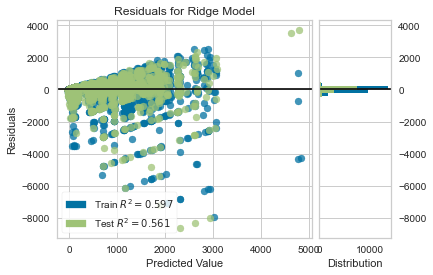

In [71]:
plot_model(tuned_ridge)

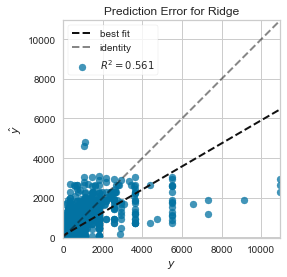

In [72]:
plot_model(tuned_ridge, plot = 'error')

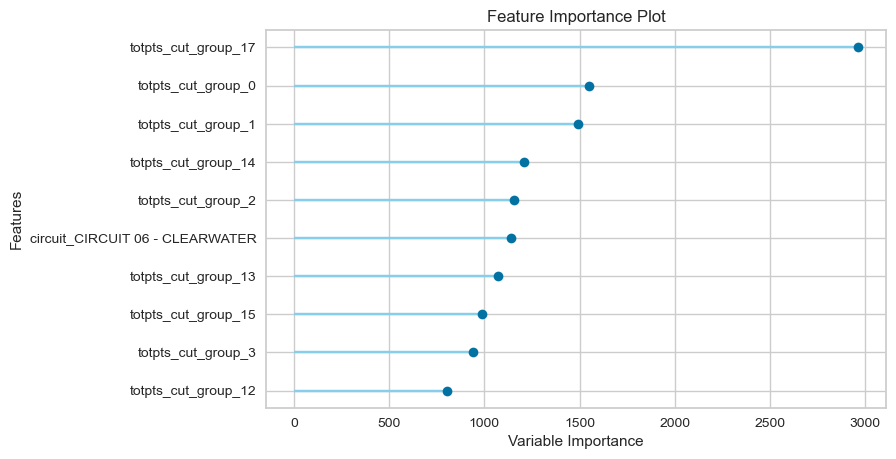

In [73]:
plot_model(tuned_ridge, plot='feature')

In [74]:
predict_model(tuned_ridge);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,125.2325,106412.3385,326.2090,0.5606,2.9113,1.0192


In [75]:
final_ridge = finalize_model(tuned_ridge)

In [76]:
print(final_ridge)

Ridge(alpha=2.81, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=True, random_state=123, solver='auto', tol=0.001)


In [166]:
predict_model(final_ridge);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,124.4909,104687.5451,323.5545,0.5678,2.9090,1.0059


In [78]:
unseen_predictions = predict_model(final_ridge, data=data_unseen)

In [79]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.sp_cj_total_days, unseen_predictions.Label, 'R2')

0.5744

In [80]:
check_metric(unseen_predictions[unseen_predictions.race=="BLACK"].sp_cj_total_days, unseen_predictions[unseen_predictions.race=="BLACK"].Label, 'R2')

0.6452

In [81]:
check_metric(unseen_predictions[unseen_predictions.race=="WHITE"].sp_cj_total_days, unseen_predictions[unseen_predictions.race=="WHITE"].Label, 'R2')

0.4954

In [82]:
save_model(final_ridge,'Final LightGBM Model (Pin-893) 23Feb2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='sp_cj_total_days',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                 ('dummy', Dummify(target='sp_cj_total_days')),
                 ('fix_perfect', Remove_100(target='sp_cj_total_days')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),


In [83]:
get_config('X_train').shape

(26523, 29)

In [84]:
get_config('X_test').dtypes

age                                float32
gender_FEMALE                      float32
race_BLACK                         float32
race_OTHER                         float32
race_WHITE                         float32
circuit_CIRCUIT 06 - CLEARWATER    float32
totpts_cut_group_0                 float32
totpts_cut_group_1                 float32
totpts_cut_group_10                float32
totpts_cut_group_11                float32
totpts_cut_group_12                float32
totpts_cut_group_13                float32
totpts_cut_group_14                float32
totpts_cut_group_15                float32
totpts_cut_group_16                float32
totpts_cut_group_17                float32
totpts_cut_group_2                 float32
totpts_cut_group_3                 float32
totpts_cut_group_4                 float32
totpts_cut_group_5                 float32
totpts_cut_group_6                 float32
totpts_cut_group_7                 float32
totpts_cut_group_8                 float32
totpts_cut_

<AxesSubplot:>

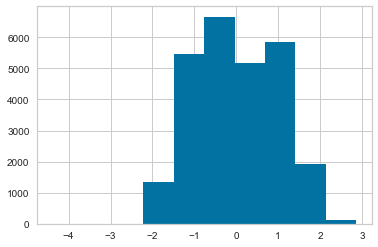

In [85]:
get_config('X_train').age.hist()

In [86]:
list(data_unseen.columns)

['sp_cj_total_days',
 'gender',
 'age',
 'race',
 'circuit',
 'totpts_cut_group',
 'clfely']

In [87]:
data_unseen.head(2)

,sp_cj_total_days,gender,age,race,circuit,totpts_cut_group,clfely
0,1482,MALE,19,BLACK,CIRCUIT 06 - CLEARWATER,6,2ND DEGREE
1,9,MALE,42,BLACK,CIRCUIT 06 - CLEARWATER,1,3RD DEGREE


In [162]:
type(data_unseen.columns)

pandas.core.indexes.base.Index

In [146]:
r = pd.Series(0, index=data_unseen.columns)

pinnelas = pd.DataFrame(columns=data_unseen.columns)
print(len(pinnelas))

0


In [147]:
for age in range(14,100):
    for gender in ("MALE","FEMALE"):
        for race in ["BLACK", "WHITE", "OTHER"]:
            for ptsgrp in range(0,18):
                for fly in ["1ST DEGREE", "1ST/LIFE", "2ND DEGREE", "3RD DEGREE", "LIFE"]:
                    row=r.copy()
                    row[list(data_unseen.columns).append] = \
                        [0, gender, age, race, "CIRCUIT 06 - CLEARWATER",ptsgrp,fly]
                    pinnelas = pinnelas.append(row, ignore_index=True)
                    

In [176]:
final = predict_model(final_ridge, data=pinnelas)
final.rename(columns = {'Label':'predicted_sentence_days'}, inplace = True)

In [177]:
final["error_margin_days"]=323.5545

In [178]:
final

,sp_cj_total_days,gender,age,race,circuit,totpts_cut_group,clfely,predicted_sentence_days,error_margin_days
0,0,MALE,14,BLACK,CIRCUIT 06 - CLEARWATER,0,1ST DEGREE,280.669922,323.5545
1,0,MALE,14,BLACK,CIRCUIT 06 - CLEARWATER,0,1ST/LIFE,210.320328,323.5545
2,0,MALE,14,BLACK,CIRCUIT 06 - CLEARWATER,0,2ND DEGREE,88.476219,323.5545
3,0,MALE,14,BLACK,CIRCUIT 06 - CLEARWATER,0,3RD DEGREE,37.259163,323.5545
4,0,MALE,14,BLACK,CIRCUIT 06 - CLEARWATER,0,LIFE,346.169708,323.5545
...,...,...,...,...,...,...,...,...,...
46435,0,FEMALE,99,OTHER,CIRCUIT 06 - CLEARWATER,17,1ST DEGREE,3976.973145,323.5545
46436,0,FEMALE,99,OTHER,CIRCUIT 06 - CLEARWATER,17,1ST/LIFE,3906.623535,323.5545
46437,0,FEMALE,99,OTHER,CIRCUIT 06 - CLEARWATER,17,2ND DEGREE,3784.779541,323.5545
46438,0,FEMALE,99,OTHER,CIRCUIT 06 - CLEARWATER,17,3RD DEGREE,3733.562500,323.5545


In [182]:
final.to_csv("./predictions.csv",index=False)